In [1]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import seaborn as sns

/Users/sos/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
def make_position_encoding(xp, batch, length, n_units, f=10000.):
    assert(n_units % 2 == 0)
    position_block = xp.broadcast_to(
        xp.arange(length)[None, None, :],
        (batch, n_units // 2, length)).astype('f')
    unit_block = xp.broadcast_to(
        xp.arange(n_units // 2)[None, :, None],
        (batch, n_units // 2, length)).astype('f')
    rad_block = position_block / (f * 1.) ** (unit_block / (n_units // 2))
    sin_block = xp.sin(rad_block)
    cos_block = xp.cos(rad_block)
    emb_block = xp.concatenate([sin_block, cos_block], axis=1)
    return emb_block

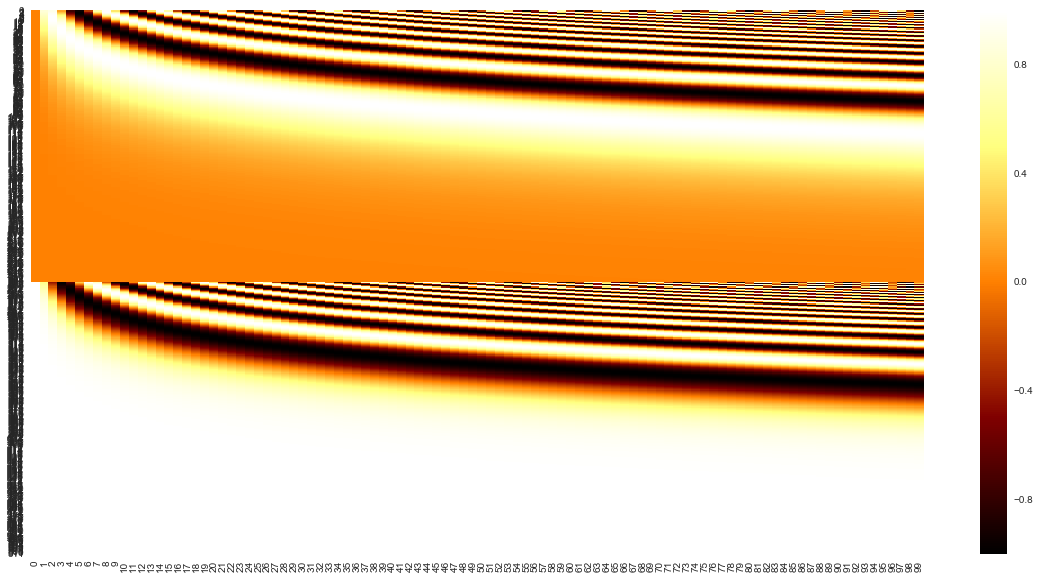

In [3]:
sns.set()
a = make_position_encoding(np, 1, 100, 512, 10000)[0]
plt.figure(figsize=(20, 10))
sns.heatmap(a, cmap='afmhot')

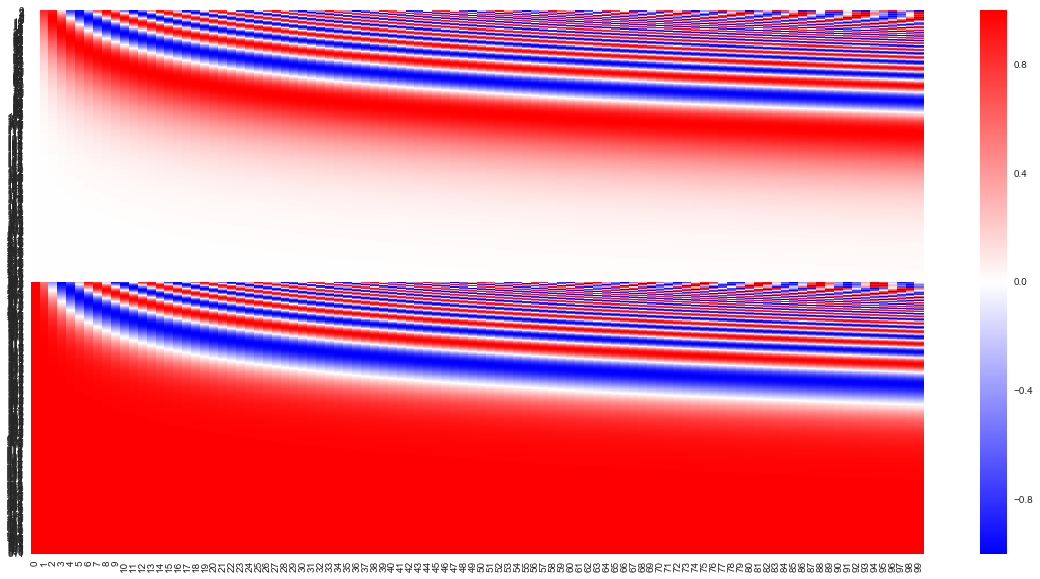

In [4]:
sns.set()
a = make_position_encoding(np, 1, 100, 512, 10000)[0]
plt.figure(figsize=(20, 10))
sns.heatmap(a, cmap="bwr")

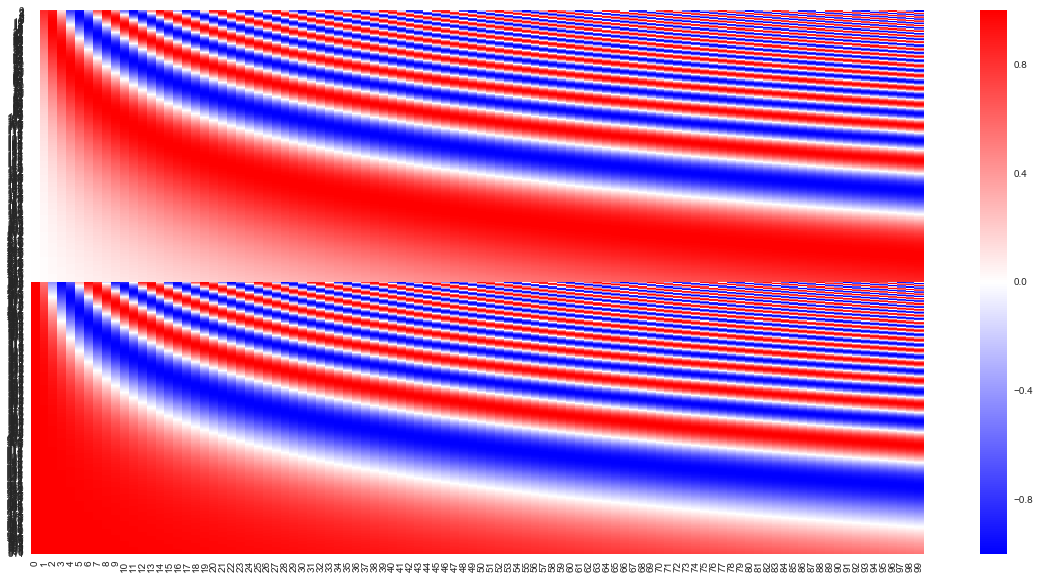

In [5]:
# change 10000 -> 100
sns.set()
# a = make_position_encoding(np, 1, 100, 512, 10000)[0]
a = make_position_encoding(np, 1, 100, 512, 100)[0]
plt.figure(figsize=(20, 10))
sns.heatmap(a, cmap="bwr")